<a href="https://colab.research.google.com/github/anirban1221/emotion-detection-app/blob/main/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anirban1004","key":"08aec4d20b7a28d230d724dfb0dde62f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 97% 63.0M/65.2M [00:00<00:00, 170MB/s]
100% 65.2M/65.2M [00:00<00:00, 159MB/s]


In [ ]:
import zipfile
zip = zipfile.ZipFile("/content/emotion-detection-fer.zip",'r')
zip.extractall("/content")
zip.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense
from keras import Sequential
from keras.applications.vgg16 import VGG16

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

train_dir='/content/train'
test_dir='/content/test'

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

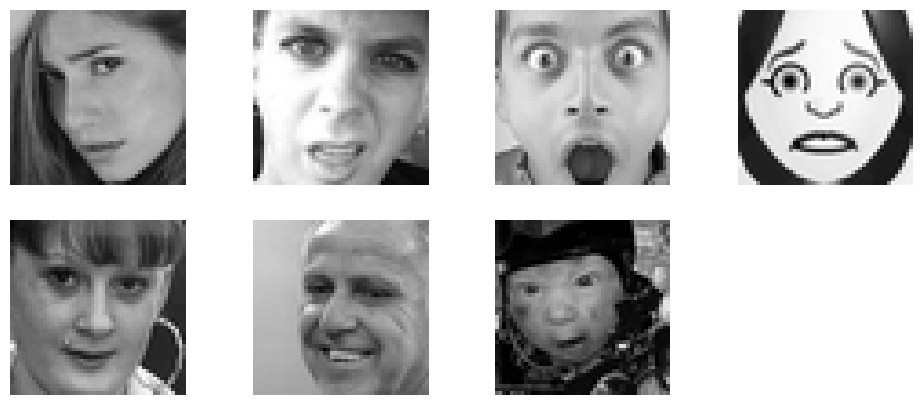

(48, 48, 3)


In [ ]:
plt.figure(figsize=(12,5))

num = 0
for i in os.listdir('/content/test'):
    path = os.path.join('/content/train',i)
    for k in os.listdir(path):
        img = cv2.imread(os.path.join(path, k))
        plt.subplot(2,4,num+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        num += 1
        break
plt.show()

print(img.shape)

In [ ]:
from collections import defaultdict
def count_images(directory):
    class_counts=defaultdict(int)
    for class_name in os.listdir(directory):
        class_path=os.path.join(directory,class_name)
        if os.path.isdir(class_path):
            class_counts[class_name]=len(os.listdir(class_path))

    return class_counts

In [ ]:
train_count=count_images(train_dir)
test_count=count_images(test_dir)

In [ ]:
print("Number of images in each class (Train):", train_count)
print("Number of images in each class (Test):", test_count)

Number of images in each class (Train): defaultdict(<class 'int'>, {'sad': 4830, 'disgusted': 436, 'surprised': 3171, 'fearful': 4097, 'neutral': 4965, 'happy': 7215, 'angry': 3995})
Number of images in each class (Test): defaultdict(<class 'int'>, {'sad': 1247, 'disgusted': 111, 'surprised': 831, 'fearful': 1024, 'neutral': 1233, 'happy': 1774, 'angry': 958})


<ipython-input-15-ccd438d0ffb9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emotions', y='count', data=train_count_df, palette='coolwarm')


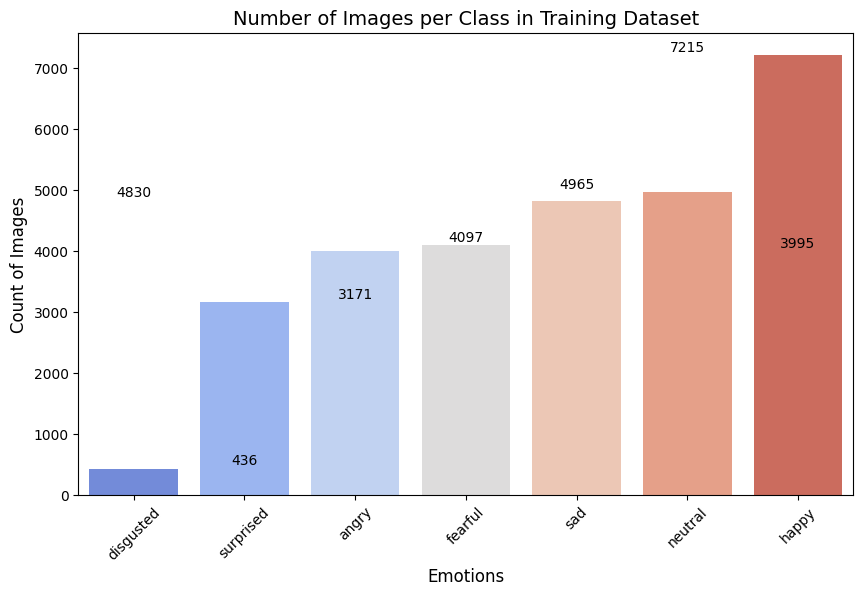

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert train_counts to a DataFrame
train_count_df = pd.DataFrame(train_count.items(), columns=['emotions', 'count'])

# Sort values for better visualization (optional)
train_count_df = train_count_df.sort_values(by='count', ascending=True)

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='emotions', y='count', data=train_count_df, palette='coolwarm')

# Add title and labels
plt.title('Number of Images per Class in Training Dataset', fontsize=14)
plt.xlabel('Emotions', fontsize=12)
plt.ylabel('Count of Images', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate the bars with counts
for index, row in train_count_df.iterrows():
    plt.text(x=index, y=row['count'] + 5, s=row['count'], ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [ ]:
train_count_df

,emotions,count
1,disgusted,436
2,surprised,3171
6,angry,3995
3,fearful,4097
0,sad,4830
4,neutral,4965
5,happy,7215


In [ ]:
disgusted_dir='/content/train/disgusted'
output_dir = '/content/train/disgusted'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
from PIL import Image
datagen = ImageDataGenerator(
    rotation_range=40,      # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    shear_range=0.2,        # Shear
    zoom_range=0.2,         # Zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill mode for new pixels
)

In [ ]:
batch_size = 1  # Process one image at a time
image_count = 0
target_augment_count = 4000  # Number of augmented images to generate

# Loop through original images
for image_name in os.listdir(disgusted_dir):
    image_path = os.path.join(disgusted_dir, image_name)
    img = Image.open(image_path)
    img = img.resize((150, 150))  # Resize to match the training size
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert to array
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for generator

    # Generate augmented images
    i = 0
    for batch in datagen.flow(img_array, batch_size=batch_size, save_to_dir=output_dir, save_prefix='disgusted', save_format='jpeg'):
        i += 1
        image_count += 1
        if image_count >= target_augment_count:  # Stop after generating enough images
            break
    if image_count >= target_augment_count:
        break

print(f"Augmentation complete. {image_count} augmented images saved to {output_dir}.")

Augmentation complete. 4000 augmented images saved to /content/train/disgusted.


In [ ]:
import os
import pandas as pd

# Define paths
train_dir = '/content/train'


# Function to collect image paths and labels
def get_image_paths_and_labels(directory, label_override=None):
    image_data = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)

        if os.path.isdir(class_path):
            # For original data, labels come from folder names
            label = class_name if not label_override else label_override

            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image_data.append((label, image_path))

        elif label_override:  # For augmented folder (flat structure)
            image_path = os.path.join(directory, class_name)
            image_data.append((label_override, image_path))

    return image_data

# Gather image paths and labels
data = get_image_paths_and_labels(train_dir)  # Original images

# Create a DataFrame
train_df = pd.DataFrame(data, columns=['emotions', 'image_path'])

# Display the first rows
print("train DataFrame:")
print(train_df.head())

# Optional: Display counts per class
print("\nImage Counts per Class:")
print(train_df['emotions'].value_counts())

train DataFrame:
  emotions                     image_path
0      sad  /content/train/sad/im2794.png
1      sad  /content/train/sad/im1750.png
2      sad    /content/train/sad/im19.png
3      sad  /content/train/sad/im4023.png
4      sad  /content/train/sad/im2032.png

Image Counts per Class:
emotions
happy        7215
neutral      4965
sad          4830
fearful      4097
angry        3995
disgusted    3720
surprised    3171
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Ensure the combined DataFrame has been created
# combined_df = your_combined_df

# Filter for the "happy" class
happy_df = train_df[train_df['emotions'] == 'happy']

# Sample 5000 images randomly (if there are more than 5000 images)
happy_sampled_df = happy_df.sample(n=5000, random_state=42) if len(happy_df) > 5000 else happy_df

# Filter the rest of the classes (excluding "happy")
other_classes_df =train_df[train_df['emotions'] != 'happy']

# Combine the sampled "happy" images with the other classes
train_df = pd.concat([other_classes_df, happy_sampled_df])

# Shuffle the DataFrame to randomize the order of images
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new DataFrame
print("Final train DataFrame with 5000 'happy' images:")
print(train_df.head())

# Optional: Check the distribution
print("\nNew class distribution:")
print(train_df['emotions'].value_counts())


Final train DataFrame with 5000 'happy' images:
    emotions                           image_path
0    fearful    /content/train/fearful/im1112.png
1      angry      /content/train/angry/im1456.png
2  surprised  /content/train/surprised/im1508.png
3      happy       /content/train/happy/im496.png
4    neutral     /content/train/neutral/im877.png

New class distribution:
emotions
happy        5000
neutral      4965
sad          4830
fearful      4097
angry        3995
disgusted    3720
surprised    3171
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Function to gather image paths and labels
def get_image_paths_and_labels(directory):
    image_data = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image_data.append((class_name, image_path))
    return image_data

# Gather data for train and test

test_data = get_image_paths_and_labels(test_dir)

# Create DataFrames

test_df = pd.DataFrame(test_data, columns=['emotions', 'image_path'])


print("\nTest DataFrame:")
print(test_df.head())



Test DataFrame:
  emotions                    image_path
0      sad    /content/test/sad/im19.png
1      sad   /content/test/sad/im533.png
2      sad   /content/test/sad/im966.png
3      sad   /content/test/sad/im349.png
4      sad  /content/test/sad/im1219.png


In [ ]:
test_df.shape

(7178, 2)

In [ ]:
train_df.shape

(29778, 2)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # DataFrame containing training data (with image paths)
    x_col='image_path',  # The column that contains the paths to the images
    y_col='emotions',    # The column that contains the labels
    target_size=(150, 150),  # Image resizing to (150, 150)
    batch_size=32,  # Batch size
    class_mode='categorical',  # Multi-class classification
    shuffle=True  # Shuffle the training data
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,  # DataFrame containing validation data
    x_col='image_path',  # Column with the image paths
    y_col='emotions',  # Column with the labels
    target_size=(150, 150),  # Image resizing
    batch_size=32,  # Batch size
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # No s
)

Found 29778 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization



In [ ]:
conv_base = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.trainable=True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_7 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,042,631 (72.64 MB)

 Trainable params: 11,407,367 (43.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 234s 235ms/step - accuracy: 0.3944 - loss: 1.5147 - val_accuracy: 0.5142 - val_loss: 1.2831
Epoch 2/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 205s 219ms/step - accuracy: 0.5271 - loss: 1.2347 - val_accuracy: 0.5274 - val_loss: 1.2430
Epoch 3/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 264s 221ms/step - accuracy: 0.5612 - loss: 1.1528 - val_accuracy: 0.5531 - val_loss: 1.1590
Epoch 4/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 208s 223ms/step - accuracy: 0.5821 - loss: 1.1039 - val_accuracy: 0.5839 - val_loss: 1.0969
Epoch 5/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 262s 223ms/step - accuracy: 0.6033 - loss: 1.0576 - val_accuracy: 0.5821 - val_loss: 1.0885
Epoch 6/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 261s 222ms/step - accuracy: 0.6145 - loss: 1.0179 - val_accuracy: 0.6000 - val_loss: 1.0512
Epoch 7/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 211s 225ms/step - accuracy: 0.6278 - loss: 0.9967 - val_accuracy: 0.5989 - val_loss: 1.0626
Epoch 8/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 264s 228ms/step - accuracy: 0.6352 -

In [ ]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump(model,file)

In [ ]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

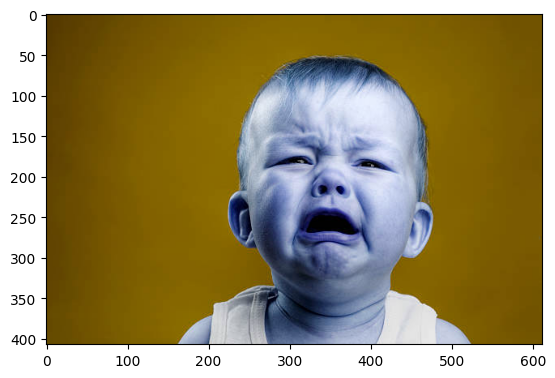

In [ ]:
test_img=cv2.imread('/content/crying image.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(407, 612, 3)

In [ ]:
test_img=cv2.resize(test_img,(150,150))

In [ ]:
test_input=test_img.reshape((1,150,150,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.000000e+00, 0.000000e+00, 9.283482e-31, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00]], dtype=float32)

In [ ]:
test_img=cv2.imread('/content/angry.jpeg')
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[1.0000000e+00, 0.0000000e+00, 2.9969905e-11, 4.6234021e-40,
        9.3891774e-33, 0.0000000e+00, 1.9792519e-25]], dtype=float32)

In [ ]:
test_img=cv2.imread('/content/smile.jpeg')
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[9.9999928e-01, 2.8414961e-36, 6.9993109e-07, 8.7634889e-27,
        1.1329033e-19, 1.1630606e-20, 1.8001445e-15]], dtype=float32)